# ROTEIRO DE AULA PRÁTICA NOME DA DISCIPLINA: 
## LINGUAGEM DE PROGRAMAÇÃO 
### Unidade: 2 – Explorando Recursos do Python Aula: 4 – Bibliotecas e Módulos Em Python

# OBJETIVOS 

* ✓ Compreender a importância dos recursos de Python; 
* ✓ Realizar a aplicação das estruturas em códigos

# Proposta da Atividade

Você foi contratado para desenvolver um sistema simples de gerenciamento de livros em uma biblioteca.  
O sistema deve permitir cadastrar novos livros, listar todos os livros disponíveis, buscar um livro pelo título, e gerar um gráfico com a quantidade de livros por gênero. 

### Passo 1: Definir a classe Livro 
• Comece definindo a estrutura básica de um livro usando uma classe em Python.  
• Cada livro terá atributos como título, autor, gênero e quantidade disponível.  

### Passo 2: Criar a lista de livros 
• Inicialize uma lista vazia para armazenar os livros que serão cadastrados. 

### Passo 3: Implementar funções para gerenciar os livros 
• Função para cadastrar um novo livro  
• Função para listar todos os livros 3  
• Função para buscar um livro pelo título  

### Passo 4: Utilizar a biblioteca Matplotlib para gerar um gráfico 
• Instalação da Matplotlib  
• Gerar o gráfico de quantidade de livros por gênero  

### Passo 5: Testar o sistema


# Execução atividade proposta

##### Bloco de importações

Bibliotecas utilizadas para realização da atividade proposta

In [ ]:
# Bloco de Import para trazer as bibliotecas necessárias
import matplotlib.pyplot as plt
from collections import defaultdict

##### Bloco de Catálogos:

Catálogos de livros utilizadas tanto para serem inseridos em bloco dentro do acervo ou de forma manual um a um:

In [128]:
# Bloco com catalogos de livros para testes

# --- Catálogo base (5 livros) --- para inserir todos automaticamente no acervo:
catalogo_fixo = [
    {"titulo": "Clean Code", "autor": "Robert C. Martin", "genero": "Tecnologia", "quantidade": 5},
    {"titulo": "Dom Casmurro", "autor": "Machado de Assis", "genero": "Romance", "quantidade": 8},
    {"titulo": "O Senhor dos Anéis", "autor": "J. R. R. Tolkien", "genero": "Fantasia", "quantidade": 4},
    {"titulo": "1984", "autor": "George Orwell", "genero": "Distopia", "quantidade": 6},
    {"titulo": "A Arte da Guerra", "autor": "Sun Tzu", "genero": "Estratégia", "quantidade": 7},
]
# --- Catalogo de recomendação (5 livros) --- para inserir manualmente no acervo:
catalogo_recomendacao = [
    {"titulo": "O Pequeno Príncipe", "autor": "Antoine de Saint-Exupéry", "genero": "Fábula", "quantidade": 10},
    {"titulo": "Sapiens: Uma Breve História da Humanidade", "autor": "Yuval Noah Harari", "genero": "História", "quantidade": 3},
    {"titulo": "O Hobbit", "autor": "J. R. R. Tolkien", "genero": "Fantasia", "quantidade": 9},
    {"titulo": "Orgulho e Preconceito", "autor": "Jane Austen", "genero": "Romance", "quantidade": 6},
    {"titulo": "Crime e Castigo", "autor": "Fiódor Dostoiévski", "genero": "Clássico", "quantidade": 4},
]


##### Definição das classes e funções

Criando o script base com as classes utilizadas (Livro e Acervo), aplicando conceitos de classe pai e filha.  
tambem é neste bloco que criamos as definições que vão compor as funcionalidades do sistema.   
*    **cadastrar_livro()** esta função herda os dados enviados pela função **cadastrar_livro_interativo()** e faz uma validação para identificar se o livro já está cadastrado no acervo com base no autor e nome do livro.  
*    **cadastrar_livro_interativo()** gera o cadastro manual para o usuário inserir as novas informações.  
*    **listar_livros()** gera uma lista de todos os livros para serem consultados posteriormente.  
*    **exibir_livros()** formata a lista gerada em **listar_livros()** em um formato de tabela mais agradável visualmente.  
*    **buscar_por_titulo()** executa uma busca dentro da lista de livros com base no seu titulo e retorna se ele existe ou não.  

In [ ]:
class Livro:
    def __init__(self, titulo, autor, genero, quantidade):
        self.titulo = titulo
        self.autor = autor
        self.genero = genero
        self.quantidade = quantidade

class Acervo:
    def __init__(self):
        self.livros = []

    def cadastrar_livro(self, livro: Livro):
        # Função para cadastrar um novo livro, evitando duplicatas
        chave = (livro.titulo.strip().lower(), livro.autor.strip().lower())
        # Verifica se já existe um livro com mesmo título e autor
        ja_existe = any(
            (l.titulo.strip().lower(), l.autor.strip().lower()) == chave
            for l in self.livros
        )
        # Se já existe, avisa e não cadastra
        if ja_existe:
            print(f"Aviso: '{livro.titulo}' de {livro.autor} já está cadastrado.")
            return
        self.livros.append(livro)
        print(f"Livro '{livro.titulo}' cadastrado com sucesso!")

    def cadastrar_livro_interativo(self):
        # Função para cadastrar um novo livro via input
        titulo = input("Digite o título do livro: ").strip()
        autor = input("Digite o autor do livro: ").strip()
        genero = input("Digite o gênero do livro: ").strip()
        quantidade = int(input("Digite a quantidade disponível: ").strip())
        self.cadastrar_livro(Livro(titulo, autor, genero, quantidade))

    def listar_livros(self):
        """Retorna uma cópia da lista de livros."""
        return list(self.livros)

    def exibir_livros(self):
        livros = self.listar_livros()
        if not livros:
            print("Acervo está vazio.")
        else:
            print(f"{'Título':40} | {'Autor':25} | {'Gênero':15} | Qtd")
            print("-"*40 + "-+-" + "-"*25 + "-+-" + "-"*15 + "-+-" + "-"*3)
            for l in livros:
                print(f"{l.titulo[:40]:40} | {l.autor[:25]:25} | {l.genero[:15]:15} | {l.quantidade:3d}")

    def buscar_por_titulo(self, termo: str):
        t = termo.strip().lower()
        return [l for l in self.livros if t in l.titulo.lower()]
    
    
if __name__ == "__main__":
    acervo = Acervo()
    print("Sistema de Gerenciamento de Livros na Biblioteca")
    print("===============================================")
    print(f'Acervo inicial: {"Vazio" if acervo.listar_livros() == [] else "Contém livros"}')
    

Sistema de Gerenciamento de Livros na Biblioteca
Acervo inicial: Vazio


##### Bloco para subir rapidamente livros no acervo:

* Se livro já estiver cadastrado retorna mensagem informando que já existe o cadastro. 

In [131]:
# --- Catálogo base (5 livros) ---
def subir_catalogo_teste(acervo):
    #Cadastra os 5 livros do catálogo fixo no acervo (evita duplicados).
    for item in catalogo_fixo: # para cada dicionário no catálogo
        try:
            qtd = int(item["quantidade"]) # tenta converter para inteiro
            if qtd < 0:
                print(f"Aviso: quantidade negativa para '{item['titulo']}'. Ignorando.") # ignora
                continue
        except (KeyError, ValueError): # se faltar a chave ou não for inteiro
            print(f"Aviso: quantidade inválida para '{item.get('titulo','<sem título>')}'. Ignorando.")
            continue
        # cadastra o livro
        acervo.cadastrar_livro(
            Livro(item["titulo"], item["autor"], item["genero"], qtd)
        )
# --- Exemplo de uso ---
subir_catalogo_teste(acervo)


Livro 'Clean Code' cadastrado com sucesso!
Livro 'Dom Casmurro' cadastrado com sucesso!
Livro 'O Senhor dos Anéis' cadastrado com sucesso!
Livro '1984' cadastrado com sucesso!
Livro 'A Arte da Guerra' cadastrado com sucesso!


##### Exibir livros cadastrados

In [132]:
# Exibir todos os livros do acervo em formato de tabela
exibir = acervo.exibir_livros()
exibir


Título                                   | Autor                     | Gênero          | Qtd
-----------------------------------------+---------------------------+-----------------+----
Clean Code                               | Robert C. Martin          | Tecnologia      |   5
Dom Casmurro                             | Machado de Assis          | Romance         |   8
O Senhor dos Anéis                       | J. R. R. Tolkien          | Fantasia        |   4
1984                                     | George Orwell             | Distopia        |   6
A Arte da Guerra                         | Sun Tzu                   | Estratégia      |   7


##### Caso queira zerar seu acervo rodar o código abaixo:

In [110]:
def limpar_acervo():
    """Limpa o acervo, removendo todos os livros."""
    acervo.livros.clear()
    print("Acervo limpo. Todos os livros foram removidos.")

limpar_acervo()

Acervo limpo. Todos os livros foram removidos.


##### Recomendações de livros:

Abaixo segue um código que gera trás mais 5 livros de outro catalogo para serem cadastrados no seu acervo para testes 

In [139]:
# livros de teste para cadastrar no acervo a partir da recomendação.
for i in catalogo_recomendacao:
    print(f"{i['titulo']} — {i['autor']} | {i['genero']} | qtd: {i['quantidade']}")

O Pequeno Príncipe — Antoine de Saint-Exupéry | Fábula | qtd: 10
Sapiens: Uma Breve História da Humanidade — Yuval Noah Harari | História | qtd: 3
O Hobbit — J. R. R. Tolkien | Fantasia | qtd: 9
Orgulho e Preconceito — Jane Austen | Romance | qtd: 6
Crime e Castigo — Fiódor Dostoiévski | Clássico | qtd: 4


##### Cadastrar manualmente livros no acervo:

In [140]:
# Cadastrar manualmente livros no acervo:
Cadastrar = acervo.cadastrar_livro_interativo()
Cadastrar

Livro 'O Hobbit' cadastrado com sucesso!


In [144]:
# Exibir exibir novamente para ver novos livros cadastrados
exibir = acervo.exibir_livros()
exibir

Título                                   | Autor                     | Gênero          | Qtd
-----------------------------------------+---------------------------+-----------------+----
Clean Code                               | Robert C. Martin          | Tecnologia      |   5
Dom Casmurro                             | Machado de Assis          | Romance         |   8
O Senhor dos Anéis                       | J. R. R. Tolkien          | Fantasia        |   4
1984                                     | George Orwell             | Distopia        |   6
A Arte da Guerra                         | Sun Tzu                   | Estratégia      |   7
O Hobbit                                 | J. R. R. Tolkien          | Fantasia        |   9


##### Consultar Livros pelo Titulo:

Execute o bloco abaixo para iniciar uma busca de um livro pelo seu título:

In [ ]:
# Consultar Livros pelo Titulo:
Buscar = acervo.buscar_por_titulo(input("Digite o título do livro para busca: "))
if not Buscar:
    print("Livro não encontrado.")
else:
    for livro in Buscar:
        print(f"Livro encontrado: {livro.titulo} do(a) autor {livro.autor} na classe {livro.genero} com {livro.quantidade} unidades disponíveis.")
# Se livro não for encontrado, a lista estará vazia.


Livro encontrado: O Hobbit do(a) autor J. R. R. Tolkien na classe Fantasia com 9 unidades disponíveis.


# Visualização Gráfica do Acervo:

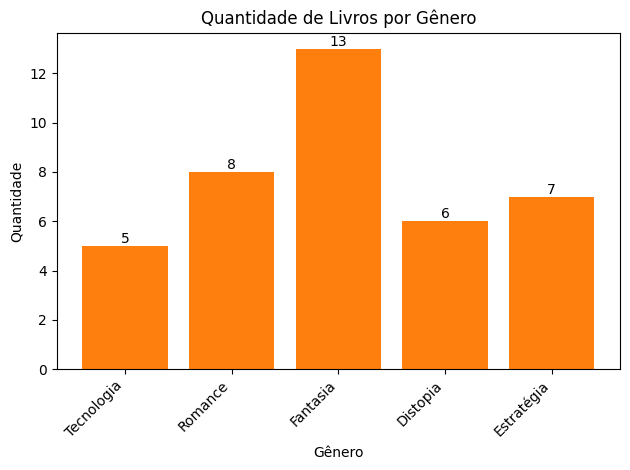

In [ ]:
# Primeiro agrupa os dados por gênero e somar as quantidades
genero_qtd = defaultdict(int)
for l in acervo.listar_livros():
    genero_qtd[l.genero] += l.quantidade

# Checa se há dados para plotar
if not genero_qtd:
    print("Acervo vazio: nada para plotar.")
else:
    # Cria os eixos do gráfico
    eixo_X = list(genero_qtd.keys())
    eixo_Y = list(genero_qtd.values())

    # Plot configurações da plotagem do gráfico
    plt.figure()
    plt.bar(eixo_X, eixo_Y)
    plt.bar_label(plt.bar(eixo_X, eixo_Y))
    plt.xlabel('Gênero')
    plt.ylabel('Quantidade')
    plt.title('Quantidade de Livros por Gênero')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # Plota o gráfico
    plt.show()
